## Future Comparison

Future comparison saved to 'Models/future_comparison.csv'


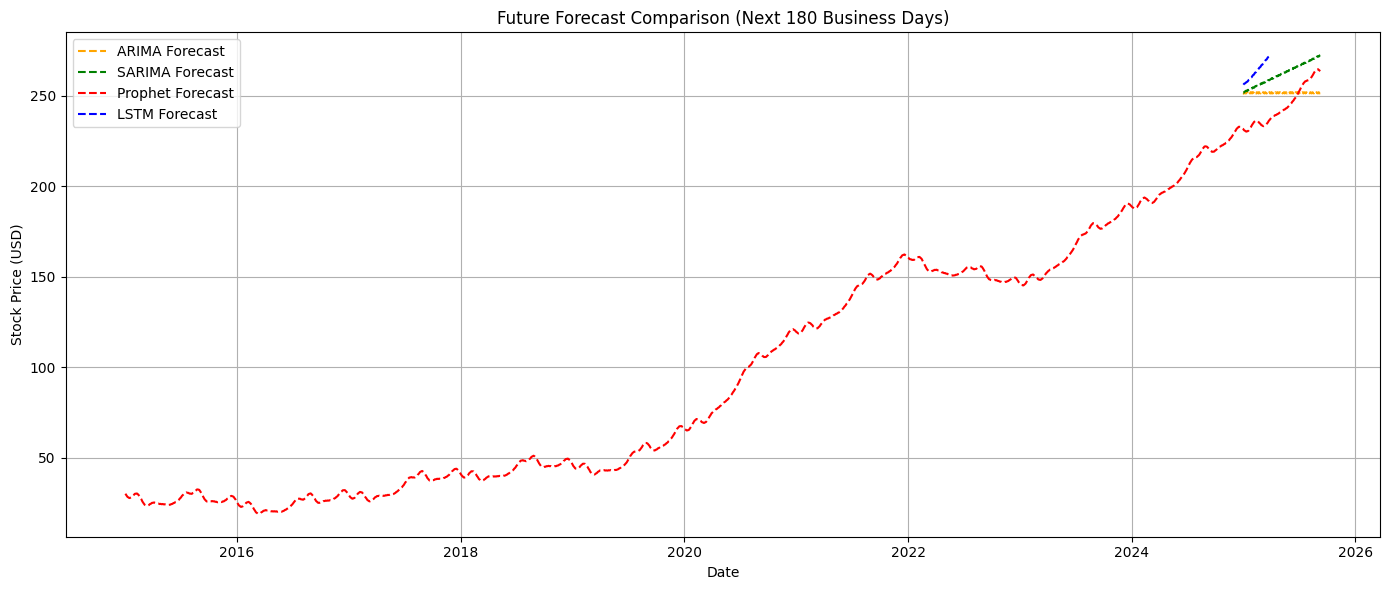

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

arima_future = pd.read_csv("Models/future_arima.csv", parse_dates=['Date'])
sarima_future = pd.read_csv("Models/future_sarima.csv", parse_dates=['Date'])
prophet_future = pd.read_csv("Models/future_prophet.csv", parse_dates=['Date'])
lstm_future = pd.read_csv("Models/future_lstm.csv", parse_dates=['Date'])

comparison_df = arima_future[['Date', 'Forecast']].rename(columns={'Forecast': 'ARIMA'})
comparison_df = comparison_df.merge(
    sarima_future[['Date', 'Forecast']].rename(columns={'Forecast': 'SARIMA'}),
    on='Date', how='outer'
)
comparison_df = comparison_df.merge(
    prophet_future[['Date', 'Forecast']].rename(columns={'Forecast': 'Prophet'}),
    on='Date', how='outer'
)
comparison_df = comparison_df.merge(
    lstm_future[['Date', 'Forecast']].rename(columns={'Forecast': 'LSTM'}),
    on='Date', how='outer'
)

os.makedirs("Models", exist_ok=True)
comparison_df.to_csv("Models/future_comparison.csv", index=False)
print("Future comparison saved to 'Models/future_comparison.csv'")

plt.figure(figsize=(14, 6))
plt.plot(comparison_df['Date'], comparison_df['ARIMA'], label='ARIMA Forecast', linestyle='--', color='orange')
plt.plot(comparison_df['Date'], comparison_df['SARIMA'], label='SARIMA Forecast', linestyle='--', color='green')
plt.plot(comparison_df['Date'], comparison_df['Prophet'], label='Prophet Forecast', linestyle='--', color='red')
plt.plot(comparison_df['Date'], comparison_df['LSTM'], label='LSTM Forecast', linestyle='--', color='blue')

plt.legend()
plt.title("Future Forecast Comparison (Next 180 Business Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
